# Titanic Machine Learninng From Disaster

In [1]:
# Importing required libraries
import io
import os
import numpy as np # linear algebra
import pandas as pd # data preprocessing, files I/O
# Data Visulazation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
titan_tr=pd.read_csv('train.csv') # importing train file

In [4]:
titan_tt=pd.read_csv('test.csv') # importing test file

In [5]:
titan_tr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titan_tr.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
titan_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
titan_tr.shape

(891, 12)

In [9]:
titan_tr.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
titan_tt.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
titan_tt.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [12]:
titan_tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [13]:
titan_tt.shape

(418, 11)

In [14]:
titan_tt.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [15]:
titan_tr.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [16]:
titan_tr.Cabin.value_counts(dropna=False)

Cabin
NaN            687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

In [17]:
titan_tr.Cabin.mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [18]:
titan_tr.Cabin.mode(dropna=False)

0    NaN
Name: Cabin, dtype: object

In [19]:
titan_tr.Cabin=titan_tr.Cabin.fillna(titan_tr.Cabin.mode()[0])

In [20]:
titan_tr.Cabin.value_counts(dropna=False)

Cabin
B96 B98        691
G6               4
C23 C25 C27      4
C22 C26          3
F33              3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 147, dtype: int64

In [21]:
titan_tr.Age.value_counts(dropna=False)

Age
NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: count, Length: 89, dtype: int64

In [22]:
titan_tr.Age=titan_tr.Age.fillna(titan_tr.Age.mean())

In [23]:
titan_tr.Embarked.value_counts(dropna=False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [24]:
titan_tr.Embarked=titan_tr.Embarked.fillna('S')

In [25]:
titan_tr.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [26]:
titan_tt.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

In [27]:
titan_tt.Cabin.value_counts(dropna=False)

Cabin
NaN                327
B57 B59 B63 B66      3
C89                  2
C116                 2
C80                  2
                  ... 
E45                  1
E52                  1
B58 B60              1
C62 C64              1
C105                 1
Name: count, Length: 77, dtype: int64

In [28]:
titan_tt.Cabin=titan_tt.Cabin.fillna(titan_tt.Cabin.mode()[0])

In [29]:
titan_tt.Cabin.value_counts(dropna=False)

Cabin
B57 B59 B63 B66    330
C89                  2
C116                 2
C80                  2
C55 C57              2
                  ... 
E45                  1
E52                  1
D30                  1
C62 C64              1
C105                 1
Name: count, Length: 76, dtype: int64

In [30]:
titan_tt.Age=titan_tt.Age.fillna(titan_tt.Age.mean())

In [31]:
titan_tt.Fare=titan_tt.Fare.fillna(titan_tt.Fare.mean())

In [32]:
titan_tt.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [33]:
titan_tr.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [34]:
titan_tr.Cabin=titan_tr.Cabin.str.replace(" ","")

In [35]:
titan_tr['Cabin']=titan_tr.Cabin.apply(lambda x:x[0])

In [36]:
titan_tr.Cabin.value_counts()

Cabin
B    734
C     59
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

In [37]:
titan_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [38]:
titan_tr.Survived=titan_tr.Survived.astype('object')
titan_tr.Pclass=titan_tr.Pclass.astype('object')
titan_tr.SibSp=titan_tr.SibSp.astype('object')
titan_tr.Parch=titan_tr.Parch.astype('object')

In [39]:
titan_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    object 
 7   Parch        891 non-null    object 
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 83.7+ KB


In [40]:
titan_tt.Cabin=titan_tt.Cabin.str.replace(" ","")

In [41]:
titan_tt['Cabin']=titan_tt.Cabin.apply(lambda x:x[0])

In [42]:
titan_tt.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,B,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,B,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,B,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,B,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,B,S


In [43]:
titan_tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [44]:
titan_tt.Pclass=titan_tt.Pclass.astype('object')
titan_tt.SibSp=titan_tt.SibSp.astype('object')
titan_tt.Parch=titan_tt.Parch.astype('object')

In [45]:
titan_tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    object 
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    object 
 6   Parch        418 non-null    object 
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(1), object(8)
memory usage: 36.1+ KB


# EDA - EXPLORATORY DATA ANALYSIS

In [46]:
titan_tr.Pclass.value_counts(dropna=False)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [47]:
titan_tr.Sex.value_counts(dropna=False)

Sex
male      577
female    314
Name: count, dtype: int64

In [48]:
titan_tr.SibSp.value_counts(dropna=False)

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [49]:
titan_tr.Parch.value_counts(dropna=False)

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [50]:
titan_tr.Cabin.value_counts(dropna=False)

Cabin
B    734
C     59
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

In [51]:
titan_tr.Embarked.value_counts(dropna=False)

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

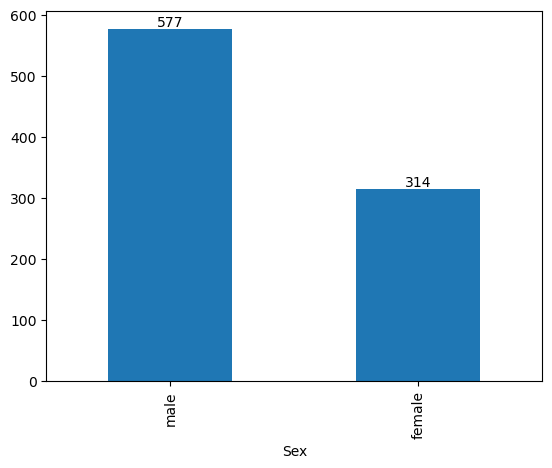

In [52]:
ax=titan_tr.Sex.value_counts(dropna=False).plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

<Axes: ylabel='count'>

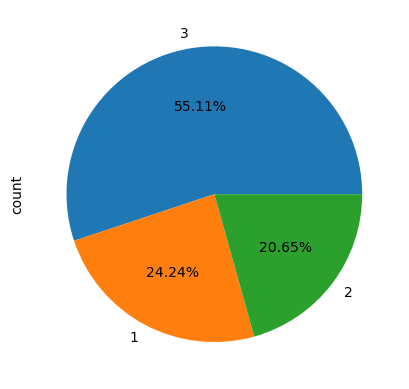

In [53]:
titan_tr.Pclass.value_counts(dropna=False).plot(kind='pie',autopct='%0.2f%%')

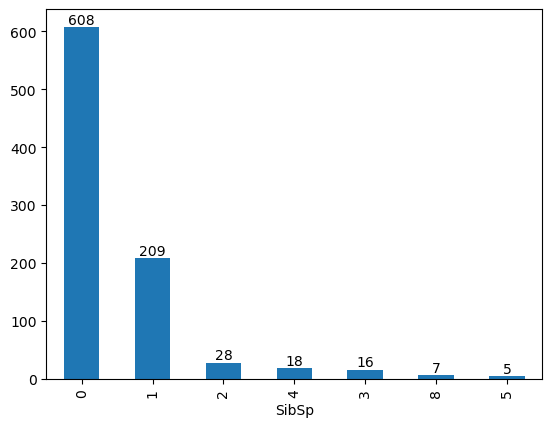

In [54]:
ax=titan_tr.SibSp.value_counts(dropna=False).plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

<Axes: ylabel='count'>

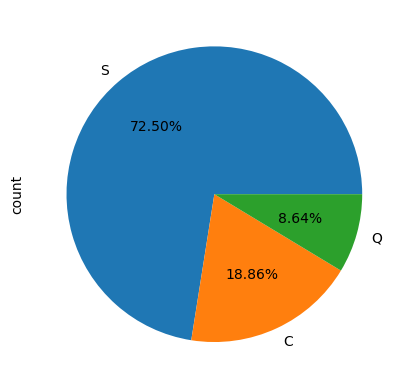

In [55]:
titan_tr.Embarked.value_counts(dropna=False).plot(kind='pie',autopct='%0.2f%%')

In [56]:
pd.crosstab(titan_tr.Cabin,titan_tr.Survived).T

Cabin,A,B,C,D,E,F,G,T
Survived,,,,,,,,
0,8,493,24,8,8,5,2,1
1,7,241,35,25,24,8,2,0


In [57]:
pd.crosstab(titan_tr.Sex,titan_tr.Survived)

Survived,0,1
Sex,,
female,81,233
male,468,109


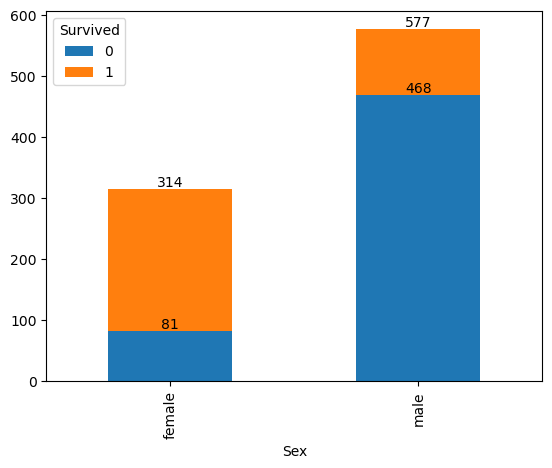

In [58]:
ax=pd.crosstab(titan_tr.Sex,titan_tr.Survived).plot(kind='bar',stacked=True)
for i in ax.containers:
    ax.bar_label(i)

In [59]:
pd.crosstab(titan_tr.Pclass,titan_tr.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


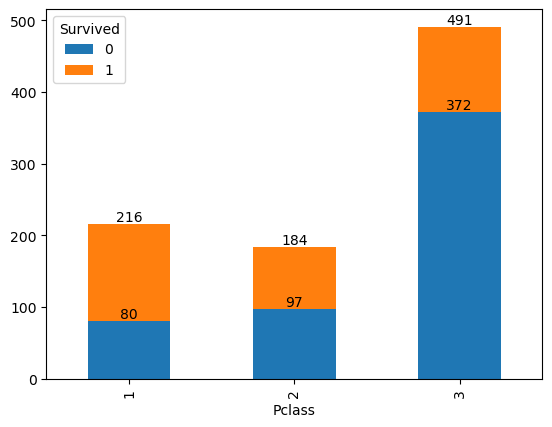

In [60]:
ax=pd.crosstab(titan_tr.Pclass,titan_tr.Survived).plot(kind='bar',stacked=True)
for i in ax.containers:
    ax.bar_label(i)

In [61]:
pd.crosstab(titan_tr.Sex,titan_tr.Cabin,values=titan_tr.Age,aggfunc='mean')

Cabin,A,B,C,D,E,F,G,T
Sex,,,,,,,,
female,48.000000,26.706387,33.644379,39.094395,33.593216,24.139824,14.75,NaN
male,41.364097,29.357654,36.550460,37.713275,41.117647,19.774890,NaN,45.0


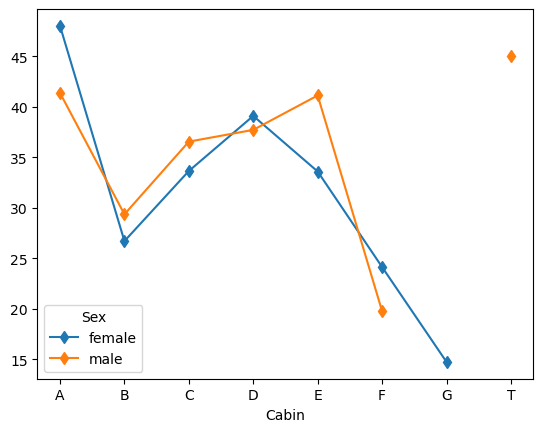

In [62]:
ax=pd.crosstab(titan_tr.Cabin,titan_tr.Sex,values=titan_tr.Age,aggfunc='mean').plot(kind='line',marker='d')

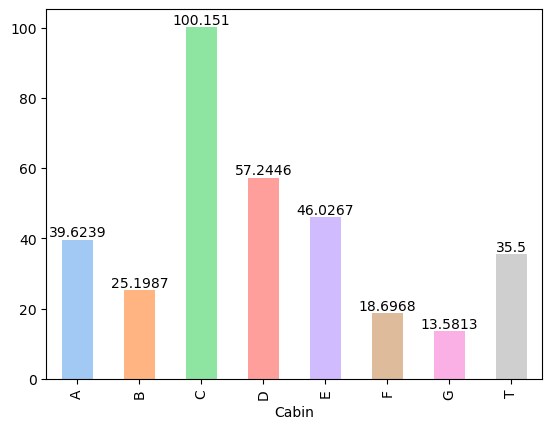

In [63]:
ax=titan_tr.Fare.groupby(titan_tr.Cabin).mean().plot(kind='bar',color=sns.color_palette('pastel'))
ax.bar_label(ax.containers[0])
plt.show()

## Inferential Statistics

### Test null average fare to different sex 

In [64]:
titan_tr.Fare.groupby(titan_tr.Sex).mean()

Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64

In [65]:
titan_tr.Fare.groupby(titan_tr.Sex).var()

Sex
female    3363.732930
male      1860.909702
Name: Fare, dtype: float64

In [66]:
# Null:There is no significante difference between average fare for different Sex
# Alternate:There is a significante difference between average fare for different Sex

In [67]:
ma=titan_tr[titan_tr.Sex=='male']
fe=titan_tr[titan_tr.Sex=='female']

In [68]:
from scipy.stats import ttest_ind

In [69]:
ttest_ind(ma.Fare,fe.Fare,equal_var=False)
# Since pvalue=5.388057409693902e-07 is less than 0.05, reject the null hypothesis
# we may conclude that there is a significance difference between average Fare for different Sex

TtestResult(statistic=-5.077499013458909, pvalue=5.388057409693902e-07, df=504.9643005334164)

### Test the null average fare for different pclass

In [70]:
titan_tr.Fare.groupby(titan_tr.Pclass).mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [71]:
titan_tr.Fare.groupby(titan_tr.Pclass).var()

Pclass
1    6143.482816
2     180.026589
3     138.724622
Name: Fare, dtype: float64

In [72]:
# Null:There is no significante difference between average fare for different pclasses
# Alternate:There is a significante difference between average fare for different pclasses

In [73]:
first_class=titan_tr[titan_tr.Pclass==1]
second_class=titan_tr[titan_tr.Pclass==2]
third_class=titan_tr[titan_tr.Pclass==3]

In [74]:
from scipy.stats import f_oneway

In [75]:
f_oneway(first_class.Fare,second_class.Fare,third_class.Fare)
# since pvalue=1.0313763209141171e-84 is lessthan 0.05 we reject null hypothesis
# we may conclude that there is a significante difference between average Fare for different pclasses

F_onewayResult(statistic=242.34415651744814, pvalue=1.0313763209141171e-84)

### Test Null No Association between survived and sex

In [76]:
pd.crosstab(titan_tr.Survived,titan_tr.Sex)

Sex,female,male
Survived,,
0,81,468
1,233,109


In [77]:
from scipy.stats import chi2_contingency

In [78]:
#Null - There is no Association between survived and sex
#Alt - There is Association between survived and sex

In [79]:
chi2_contingency(pd.crosstab(titan_tr.Survived,titan_tr.Sex))
# since pvalue = 1.1973570627755645e-58  is less than 0.05, Reject Null Hypothesis

Chi2ContingencyResult(statistic=260.71702016732104, pvalue=1.1973570627755645e-58, dof=1, expected_freq=array([[193.47474747, 355.52525253],
       [120.52525253, 221.47474747]]))

In [80]:
titan_tr.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

# Splitting into numcols and objcols for preprocessing

In [81]:
numcols=titan_tr.select_dtypes(include=np.number)
objcols=titan_tr.select_dtypes(include='object')

In [82]:
numcols.head()

,PassengerId,Age,Fare
0,1,22.0,7.2500
1,2,38.0,71.2833
2,3,26.0,7.9250
3,4,35.0,53.1000
4,5,35.0,8.0500


In [83]:
numcols=numcols.drop('PassengerId',axis=1)
numcols.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [84]:
numcols.corr()

,Age,Fare
Age,1.000000,0.091566
Fare,0.091566,1.000000


<Axes: >

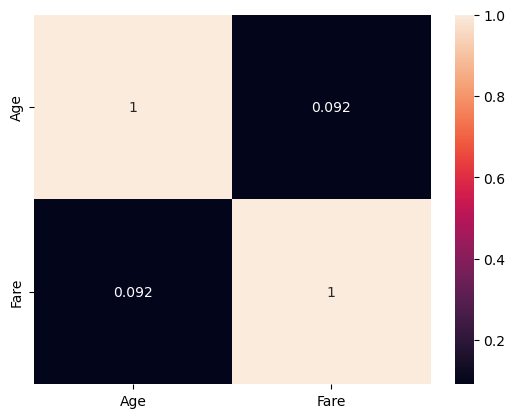

In [85]:
sns.heatmap(numcols.corr(),annot=True)

In [86]:
objcols.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,B,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,C,C
2,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,B,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,C,S
4,0,3,"Allen, Mr. William Henry",male,0,0,373450,B,S


In [87]:
objcols=objcols.drop(['Name','Ticket'],axis=1)

In [88]:
objcols.head()

,Survived,Pclass,Sex,SibSp,Parch,Cabin,Embarked
0,0,3,male,1,0,B,S
1,1,1,female,1,0,C,C
2,1,3,female,0,0,B,S
3,1,1,female,1,0,C,S
4,0,3,male,0,0,B,S


# Label Encoding the object columns

In [89]:
from sklearn.preprocessing import LabelEncoder

In [90]:
objcols = objcols.astype(str)

In [91]:
objcols=objcols.apply(LabelEncoder().fit_transform)

In [92]:
objcols.head()

,Survived,Pclass,Sex,SibSp,Parch,Cabin,Embarked
0,0,2,1,1,0,1,2
1,1,0,0,1,0,2,0
2,1,2,0,0,0,1,2
3,1,0,0,1,0,2,2
4,0,2,1,0,0,1,2


# combining numcols and objcols

In [93]:
titandf_tr=pd.concat([numcols,objcols],axis=1)

In [94]:
titandf_tr.head()

,Age,Fare,Survived,Pclass,Sex,SibSp,Parch,Cabin,Embarked
0,22.0,7.2500,0,2,1,1,0,1,2
1,38.0,71.2833,1,0,0,1,0,2,0
2,26.0,7.9250,1,2,0,0,0,1,2
3,35.0,53.1000,1,0,0,1,0,2,2
4,35.0,8.0500,0,2,1,0,0,1,2


In [95]:
titandf_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   Fare      891 non-null    float64
 2   Survived  891 non-null    int32  
 3   Pclass    891 non-null    int32  
 4   Sex       891 non-null    int32  
 5   SibSp     891 non-null    int32  
 6   Parch     891 non-null    int32  
 7   Cabin     891 non-null    int32  
 8   Embarked  891 non-null    int32  
dtypes: float64(2), int32(7)
memory usage: 38.4 KB


In [96]:
titan_tt.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,B,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,B,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,B,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,B,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,B,S


In [97]:
titan_tt=titan_tt.drop(['PassengerId','Name','Ticket'],axis=1)
titan_tt.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,B,Q
1,3,female,47.0,1,0,7.0000,B,S
2,2,male,62.0,0,0,9.6875,B,Q
3,3,male,27.0,0,0,8.6625,B,S
4,3,female,22.0,1,1,12.2875,B,S


In [98]:
titan_tt[['Sex','Embarked','Cabin','Pclass','SibSp','Parch']]=titan_tt[['Sex','Embarked','Cabin','Pclass','SibSp','Parch']].apply(LabelEncoder().fit_transform)
titan_tt.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,2,1,34.5,0,0,7.8292,1,1
1,2,0,47.0,1,0,7.0000,1,2
2,1,1,62.0,0,0,9.6875,1,1
3,2,1,27.0,0,0,8.6625,1,2
4,2,0,22.0,1,1,12.2875,1,2


# Splitting into Dependent and independent variables

In [99]:
X=titandf_tr.drop('Survived',axis=1)
y=titandf_tr.Survived

In [100]:
X.head()

,Age,Fare,Pclass,Sex,SibSp,Parch,Cabin,Embarked
0,22.0,7.2500,2,1,1,0,1,2
1,38.0,71.2833,0,0,1,0,2,0
2,26.0,7.9250,2,0,0,0,1,2
3,35.0,53.1000,0,0,1,0,2,2
4,35.0,8.0500,2,1,0,0,1,2


In [101]:
titan_tt=titan_tt[['Age','Fare','Pclass','Sex','SibSp','Parch','Cabin','Embarked']]

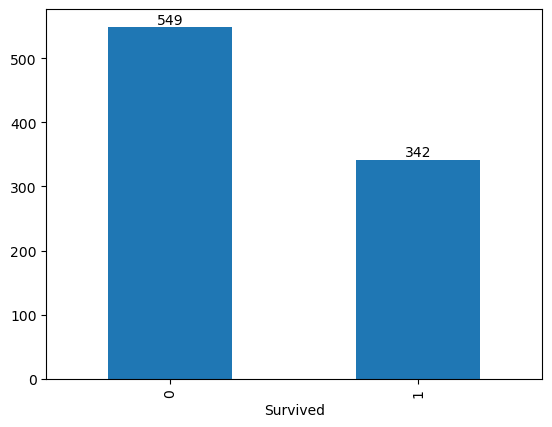

In [102]:
ax=y.value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

<Axes: xlabel='Survived'>

<Figure size 3000x1500 with 0 Axes>

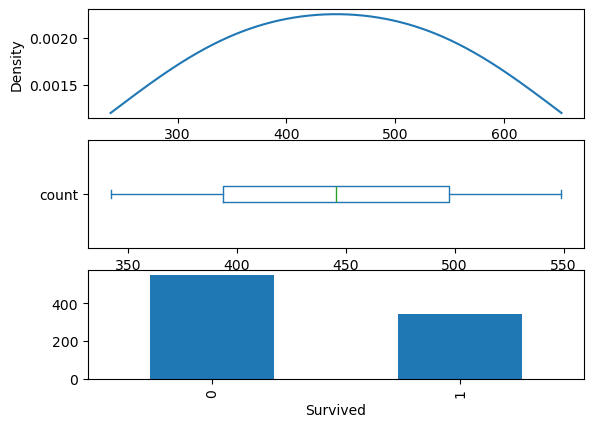

In [103]:
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)
y.value_counts().plot(kind='kde',ax=ax[0])
y.value_counts().plot(kind='box',ax=ax[1],vert=False)
y.value_counts().plot(kind='bar',ax=ax[2])

# Building Model
### Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression

In [105]:
reg=LogisticRegression()

In [106]:
regmodel=reg.fit(X,y)

In [107]:
regmodel.score(X,y)

0.8080808080808081

In [108]:
reg_X=reg.predict(X)

In [109]:
pd.crosstab(y,reg_X)

col_0,0,1
Survived,,
0,474,75
1,96,246


In [110]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,RocCurveDisplay

In [111]:
cross_val_score(reg,X,y)

C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

array([0.79888268, 0.79213483, 0.78651685, 0.79213483, 0.8258427 ])

In [112]:
np.mean([0.79888268, 0.79213483, 0.78651685, 0.79213483, 0.8258427 ])

0.799102378

In [113]:
print(classification_report(y,reg_X))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       549
           1       0.77      0.72      0.74       342

    accuracy                           0.81       891
   macro avg       0.80      0.79      0.79       891
weighted avg       0.81      0.81      0.81       891



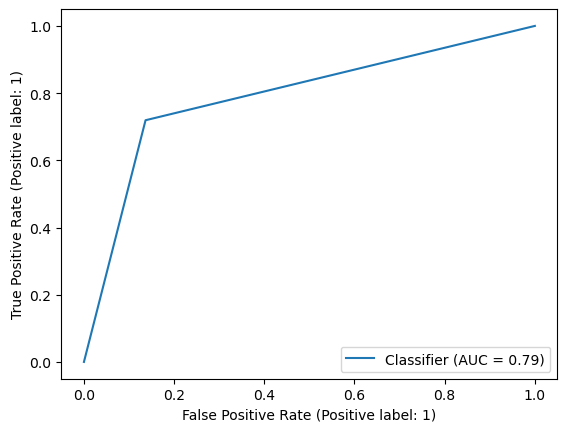

In [114]:
RocCurveDisplay.from_predictions(y,reg_X)

In [115]:
reg_predict=reg.predict(titan_tt)

In [116]:
pd.DataFrame(reg_predict).to_csv('reg.csv')

# Decision Tree

In [117]:
from sklearn.tree import DecisionTreeClassifier

In [118]:
tree=DecisionTreeClassifier(max_depth=6)

In [119]:
treemodel=tree.fit(X,y)

In [120]:
treemodel.score(X,y)

0.8653198653198653

In [121]:
cross_val_score(tree,X,y)

array([0.81005587, 0.80337079, 0.81460674, 0.76966292, 0.85955056])

In [122]:
np.mean([0.80446927, 0.80337079, 0.82022472, 0.7752809 , 0.85955056])

0.8125792479999999

In [123]:
tree_X=tree.predict(X)

In [124]:
pd.crosstab(y,tree_X)

col_0,0,1
Survived,,
0,517,32
1,88,254


In [125]:
print(classification_report(y,tree_X))

              precision    recall  f1-score   support

           0       0.85      0.94      0.90       549
           1       0.89      0.74      0.81       342

    accuracy                           0.87       891
   macro avg       0.87      0.84      0.85       891
weighted avg       0.87      0.87      0.86       891



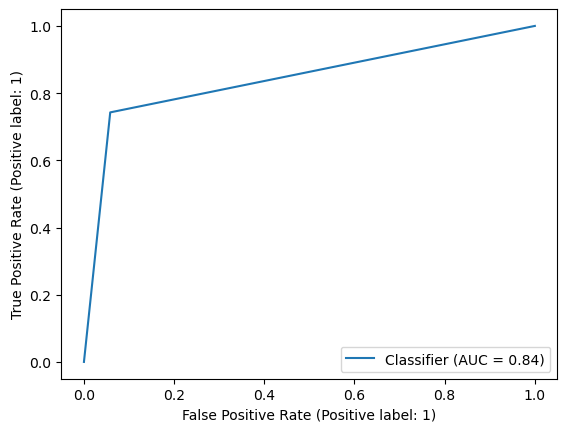

In [126]:
RocCurveDisplay.from_predictions(y,tree_X)

In [127]:
tree_preict_test=tree.predict(titan_tt)

In [128]:
pd.DataFrame(tree_preict_test).to_csv('tree.csv')

# Random Forest

In [129]:
from sklearn.ensemble import RandomForestClassifier

In [130]:
rf=RandomForestClassifier(max_depth=4)

In [131]:
rfmodel=rf.fit(X,y)

In [132]:
rfmodel.score(X,y)

0.8439955106621774

In [133]:
cross_val_score(rf,X,y)

array([0.76536313, 0.80898876, 0.84831461, 0.79775281, 0.85955056])

In [134]:
np.mean([0.74301676, 0.81460674, 0.85393258, 0.78651685, 0.85955056])

0.811524698

In [135]:
rf_X=rf.predict(X)

In [136]:
pd.crosstab(y,rf_X)

col_0,0,1
Survived,,
0,517,32
1,107,235


In [137]:
print(classification_report(y,rf_X))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       549
           1       0.88      0.69      0.77       342

    accuracy                           0.84       891
   macro avg       0.85      0.81      0.83       891
weighted avg       0.85      0.84      0.84       891



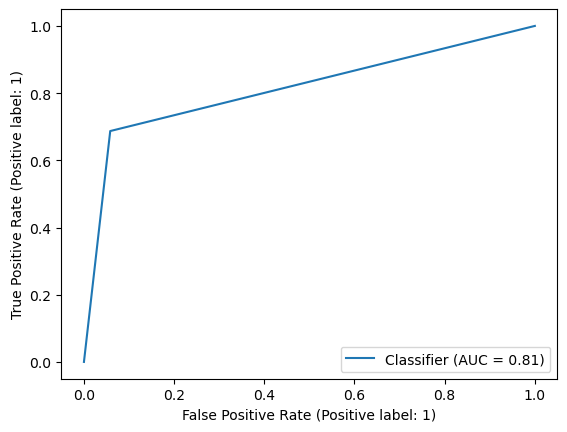

In [138]:
RocCurveDisplay.from_predictions(y,rf_X)

In [139]:
rf_predict_test=rf.predict(titan_tt)

In [140]:
pd.DataFrame(rf_predict_test).to_csv('rf.csv')

# GRADIENT BOOSTING MACHINE

In [141]:
from sklearn.ensemble import GradientBoostingClassifier

In [142]:
gbc=GradientBoostingClassifier(max_depth=2,n_estimators=200)

In [143]:
gbcmodel=gbc.fit(X,y)

In [144]:
gbc.score(X,y)

0.8698092031425365

In [145]:
cross_val_score(gbc,X,y)

array([0.79888268, 0.82022472, 0.83146067, 0.79213483, 0.87078652])

In [146]:
np.mean([0.79888268, 0.82022472, 0.83146067, 0.79213483, 0.87078652])

0.8226978840000001

In [147]:
gbc_X=gbc.predict(X)

In [148]:
pd.crosstab(y,gbc_X)

col_0,0,1
Survived,,
0,516,33
1,83,259


In [149]:
print(classification_report(y,gbc_X))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       549
           1       0.89      0.76      0.82       342

    accuracy                           0.87       891
   macro avg       0.87      0.85      0.86       891
weighted avg       0.87      0.87      0.87       891



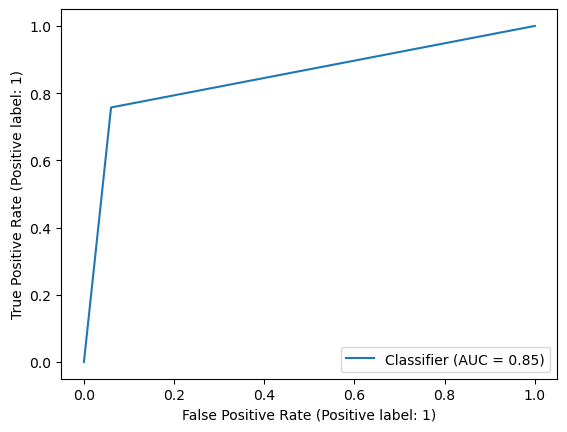

In [150]:
RocCurveDisplay.from_predictions(y,gbc_X)

In [151]:
gbc_predict_test=gbc.predict(titan_tt)

In [152]:
pd.DataFrame(gbc_predict_test).to_csv('gbc.csv')

# Support Vector Machine

In [153]:
from sklearn.svm import SVC

In [154]:
svc=SVC(C=5,max_iter=1000)

In [155]:
svcmodel=svc.fit(X,y)

C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [156]:
svcmodel.score(X,y)

0.7216610549943884

In [157]:
cross_val_score(svc,X,y)

C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


array([0.60335196, 0.7247191 , 0.70786517, 0.71910112, 0.73033708])

In [158]:
np.mean([0.60335196, 0.7247191 , 0.70786517, 0.71910112, 0.73033708])

0.697074886

In [159]:
svc_X=svc.predict(X)

In [160]:
pd.crosstab(y,svc_X)

col_0,0,1
Survived,,
0,499,50
1,198,144


In [161]:
print(classification_report(y,svc_X))

              precision    recall  f1-score   support

           0       0.72      0.91      0.80       549
           1       0.74      0.42      0.54       342

    accuracy                           0.72       891
   macro avg       0.73      0.66      0.67       891
weighted avg       0.73      0.72      0.70       891



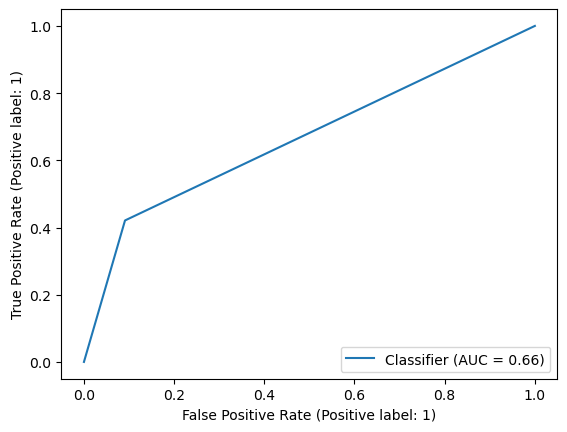

In [162]:
RocCurveDisplay.from_predictions(y,svc_X)

In [163]:
svc_predict_test=svc.predict(titan_tt)

In [164]:
pd.DataFrame(svc_predict_test).to_csv('svc.csv')

# KNN

In [165]:
from sklearn.neighbors import KNeighborsClassifier

In [166]:
knc=KNeighborsClassifier()

In [167]:
kncmodel=knc.fit(X,y)

In [168]:
kncmodel.score(X,y)

0.813692480359147

In [169]:
cross_val_score(knc,X,y)

array([0.65921788, 0.6741573 , 0.71910112, 0.7247191 , 0.7247191 ])

In [170]:
np.mean([0.65921788, 0.6741573 , 0.71910112, 0.7247191 , 0.7247191 ])

0.7003828999999999

In [171]:
knc_X=knc.predict(X)

In [172]:
pd.crosstab(y,knc_X)

col_0,0,1
Survived,,
0,485,64
1,102,240


In [173]:
print(classification_report(y,knc_X))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       549
           1       0.79      0.70      0.74       342

    accuracy                           0.81       891
   macro avg       0.81      0.79      0.80       891
weighted avg       0.81      0.81      0.81       891



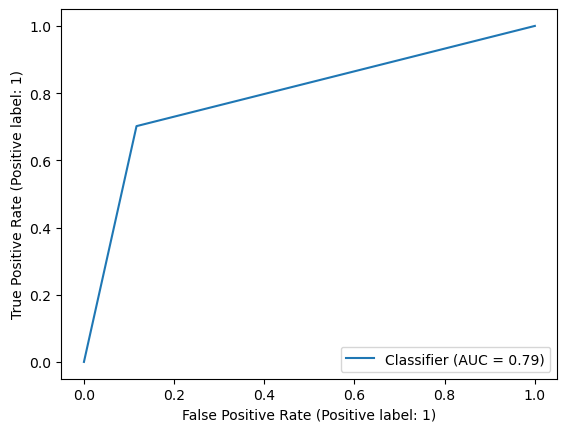

In [174]:
RocCurveDisplay.from_predictions(y,knc_X)

In [175]:
knc_predict_test=knc.predict(titan_tt)

In [176]:
pd.DataFrame(knc_predict_test).to_csv('knc.csv')

# Naive Bayes
### GaussianNB

In [177]:
from sklearn.naive_bayes import GaussianNB

In [178]:
gnb=GaussianNB()

In [179]:
gnbmodel=gnb.fit(X,y)

In [180]:
gnbmodel.score(X,y)

0.7991021324354658

In [181]:
cross_val_score(gnb,X,y)

array([0.70949721, 0.78651685, 0.81460674, 0.7752809 , 0.83707865])

In [182]:
np.mean([0.70949721, 0.78651685, 0.81460674, 0.7752809 , 0.83707865])

0.78459607

In [183]:
gnb_X=gnb.predict(X)

In [184]:
pd.crosstab(y,gnb_X)

col_0,0,1
Survived,,
0,471,78
1,101,241


In [185]:
print(classification_report(y,gnb_X))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       549
           1       0.76      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.78       891
weighted avg       0.80      0.80      0.80       891



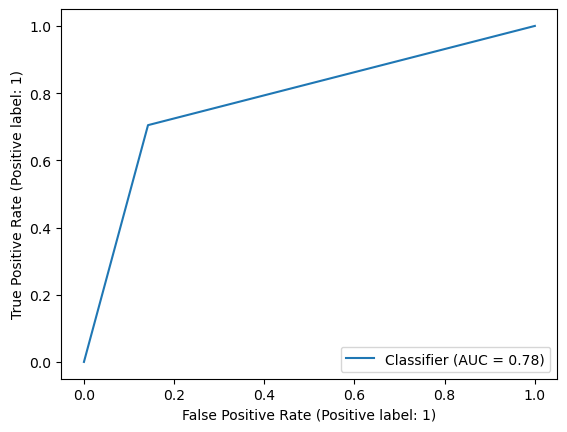

In [186]:
RocCurveDisplay.from_predictions(y,gnb_X)

In [187]:
gnb_predict_test=gnb.predict(titan_tt)

In [188]:
pd.DataFrame(gnb_predict_test).to_csv('gaussian.csv')

# MultinomialNB

In [189]:
from sklearn.naive_bayes import MultinomialNB

In [190]:
mb=MultinomialNB()

In [191]:
mbmodel=mb.fit(X,y)

In [192]:
mbmodel.score(X,y)

0.6891133557800224

In [193]:
cross_val_score(mb,X,y)

array([0.59217877, 0.71348315, 0.70224719, 0.73033708, 0.70786517])

In [194]:
np.mean([0.59217877, 0.71348315, 0.70224719, 0.73033708, 0.70786517])

0.689222272

In [195]:
mb_X=mb.predict(X)

In [196]:
pd.crosstab(y,mb_X)

col_0,0,1
Survived,,
0,455,94
1,183,159


In [197]:
print(classification_report(y,mb_X))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77       549
           1       0.63      0.46      0.53       342

    accuracy                           0.69       891
   macro avg       0.67      0.65      0.65       891
weighted avg       0.68      0.69      0.68       891



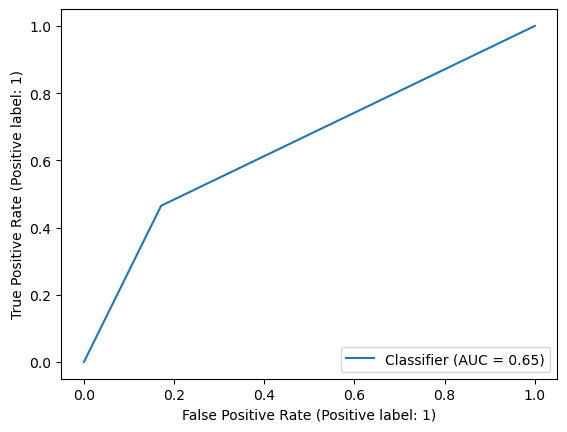

In [198]:
RocCurveDisplay.from_predictions(y,mb_X)

In [199]:
mb_predict_test=mb.predict(titan_tt)

In [200]:
pd.DataFrame(mb_predict_test).to_csv('multinomial.csv')

# BernouliNB

In [201]:
from sklearn.naive_bayes import BernoulliNB

In [202]:
bnb=BernoulliNB()

In [203]:
bnbmodel=bnb.fit(X,y)

In [204]:
bnbmodel.score(X,y)

0.7856341189674523

In [205]:
cross_val_score(bnb,X,y)

array([0.76536313, 0.80337079, 0.79775281, 0.75842697, 0.78651685])

In [206]:
np.mean([0.76536313, 0.80337079, 0.79775281, 0.75842697, 0.78651685])

0.78228611

In [207]:
bnb_X=bnb.predict(X)

In [208]:
pd.crosstab(y,bnb_X)

col_0,0,1
Survived,,
0,451,98
1,93,249


In [209]:
print(classification_report(y,bnb_X))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       549
           1       0.72      0.73      0.72       342

    accuracy                           0.79       891
   macro avg       0.77      0.77      0.77       891
weighted avg       0.79      0.79      0.79       891



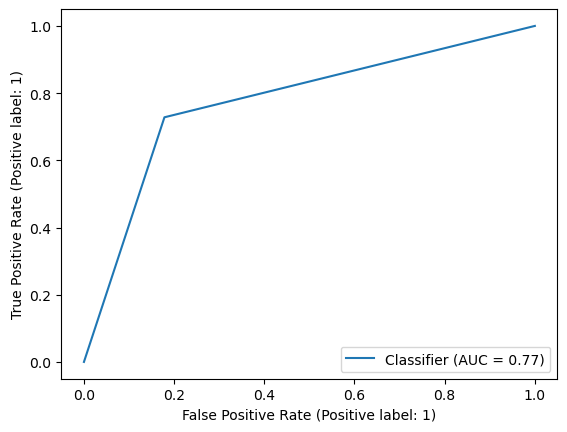

In [210]:
RocCurveDisplay.from_predictions(y,bnb_X)

In [211]:
bnb_predict_test=bnb.predict(titan_tt)

In [212]:
pd.DataFrame(bnb_predict_test).to_csv('bernouli.csv')

# CategoricalNB

In [225]:
from sklearn.naive_bayes import CategoricalNB

In [226]:
cat=CategoricalNB()

In [227]:
catmodel=cat.fit(X,y)

In [228]:
catmodel.score(X,y)

0.8159371492704826

In [229]:
cross_val_score(cat,X,y)

C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 140, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "C:\Users\Eswar Aditya\anaconda3\Lib\site-packages\sklearn\naive_bayes.py", line 102

array([0.66480447,        nan, 0.80898876,        nan, 0.84269663])

In [230]:
np.mean([0.66480447,0.80898876, 0.84269663])

0.7721632866666667

In [231]:
cat_X=cat.predict(X)

In [232]:
pd.crosstab(y,cat_X)

col_0,0,1
Survived,,
0,487,62
1,102,240


In [233]:
print(classification_report(y,cat_X))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       549
           1       0.79      0.70      0.75       342

    accuracy                           0.82       891
   macro avg       0.81      0.79      0.80       891
weighted avg       0.81      0.82      0.81       891



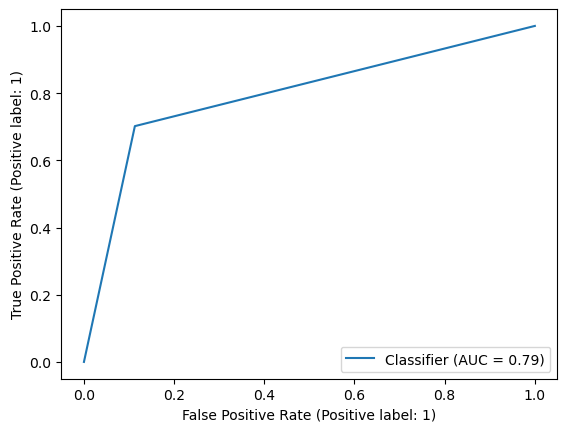

In [234]:
RocCurveDisplay.from_predictions(y,cat_X)

In [235]:
cat_predict_test=cat.predict(titan_tt)

IndexError: index 7 is out of bounds for axis 1 with size 7

# Knearest Neighbors

In [213]:
from sklearn.neighbors import KNeighborsClassifier

In [214]:
knc=KNeighborsClassifier()

In [215]:
kncmodel=knc.fit(X,y)

In [216]:
kncmodel.score(X,y)

0.813692480359147

In [217]:
cross_val_score(knc,X,y)

array([0.65921788, 0.6741573 , 0.71910112, 0.7247191 , 0.7247191 ])

In [218]:
np.mean

<function numpy.mean(a, axis=None, dtype=None, out=None, keepdims=<no value>, *, where=<no value>)>

In [219]:
knc_X=knc.predict(X)

In [220]:
pd.crosstab(y,knc_X)

col_0,0,1
Survived,,
0,485,64
1,102,240


In [221]:
print(classification_report(y,knc_X))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       549
           1       0.79      0.70      0.74       342

    accuracy                           0.81       891
   macro avg       0.81      0.79      0.80       891
weighted avg       0.81      0.81      0.81       891



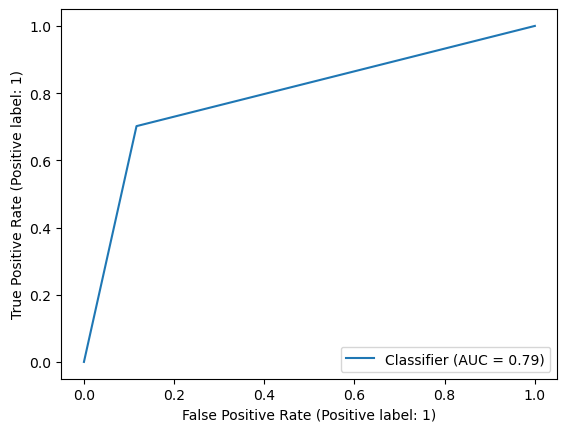

In [222]:
RocCurveDisplay.from_predictions(y,knc_X)

In [223]:
knc_predict_test=knc.predict(titan_tt)

In [224]:
pd.DataFrame(knc_predict_test).to_csv('knn.csv')

# Summary:
After building and evaluating various machine learning models, we have compiled additional information, including Precision, Recall (Sensitivity), F1-Score, and ROC-AUC to provide a comprehensive summary. Below is a table summarizing the models, their machine learning scores, Accuracy, and ROC-AUC values:

|Model Name|Accuracy|ROC-AUC|
|:--|:--:|:--:|
|Logistic Regression|	0.8249158249158249	|0.81|
|Decision Tree|	0.8237934904601572	|0.79|
|Random Forest|	0.8338945005611672	|0.81|
|Gradient Boosting Machine|	0.9382716049382716|	0.93|
|Naive Bayes|	0.7811447811447811	|0.76|
|Support Vector Machine|	0.7957351290684624|	0.78|
|KNearestNeighbors|0.813692480359147|0.79|

The "Gradient Boosting Machine" model has a significantly higher Accuracy score than its counterparts, indicating its superior predictive performance for this dataset. The higher Accuracy value suggests that the Gradient Boosting Machine model yields predictions that are more closely aligned with actual outcomes, which is particularly valuable for Classification tasks where Categorical prediction accuracy is crucial.

In light of these findings, it's advisable to consider the Gradient Boosting Machine model as a more reliable option for Classification analysis on the Titanic survival prediction dataset, prioritizing Accuracy as the key performance indicator score.